# Download das bibliotecas

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Invocação dos Datasets

In [13]:
clicks_data = pd.read_csv('clicks_data.csv')
mouse_data = pd.read_csv('mouse_movements.csv')

In [14]:
clicks_data

,Timestamp,PosX,PosY,ShapeIndex,ShapeType
0,10.297,209,200,0,Circle
1,41.750,556,164,-1,NaN
2,43.700,153,692,-1,NaN
3,44.567,281,321,1,Rectangle
4,52.689,319,312,1,Rectangle
5,65.614,748,744,1,Rectangle
6,75.960,370,412,0,Circle
7,88.597,196,290,-1,NaN
8,112.253,389,281,2,Triangle
9,118.598,221,191,2,Triangle


In [15]:
mouse_data

,Timestamp,PosX,PosY
0,0.453,12,528
1,0.469,127,462
2,0.486,203,416
3,0.503,330,334
4,0.519,386,300
...,...,...,...
521,135.557,451,256
522,135.574,459,260
523,135.591,467,264
524,135.607,469,264


# Criação dos gráficos

## Gráfico de trajetória do mouse

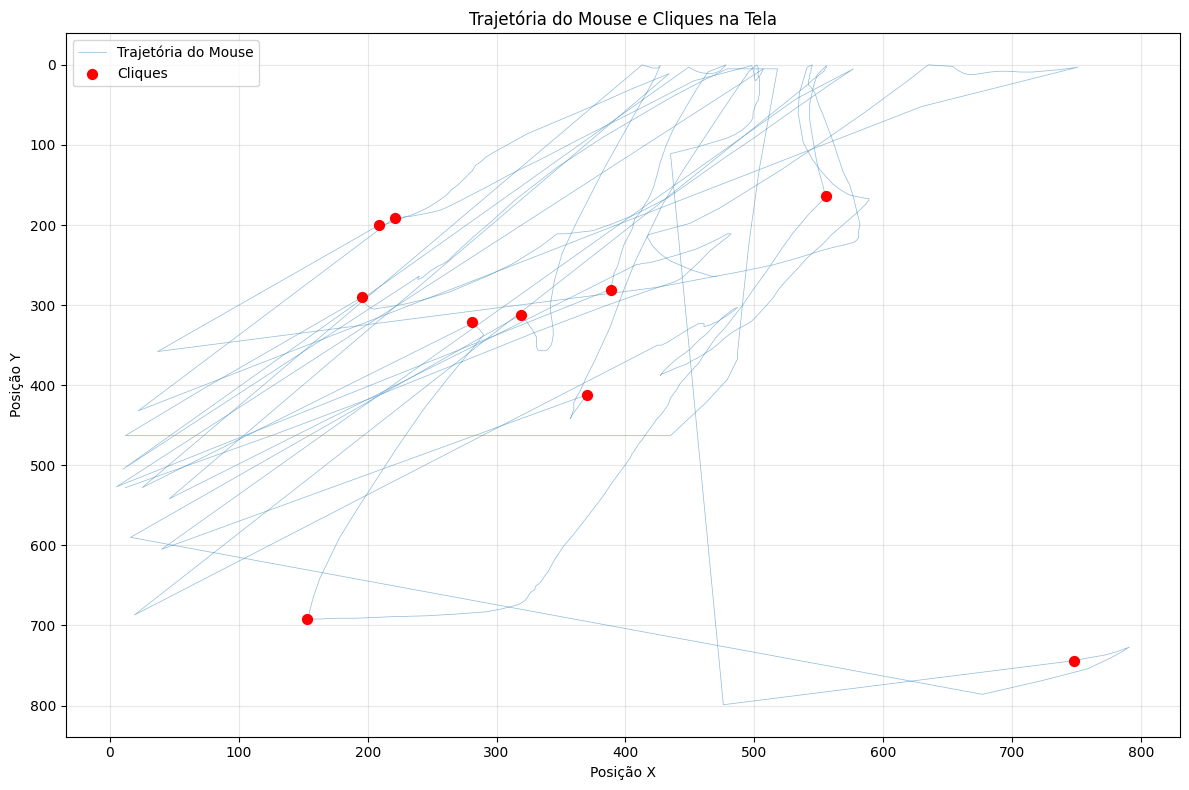

In [19]:
plt.figure(figsize=(12, 8))
plt.plot(mouse_data['PosX'], mouse_data['PosY'], alpha=0.5, linewidth=0.5, label='Trajetória do Mouse')
plt.scatter(clicks_data['PosX'], clicks_data['PosY'], c='red', s=50, label='Cliques', zorder=5)

plt.gca().invert_yaxis()
plt.xlabel('Posição X')
plt.ylabel('Posição Y')
plt.title('Trajetória do Mouse e Cliques na Tela')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig("mouse_traj.png")
plt.show()

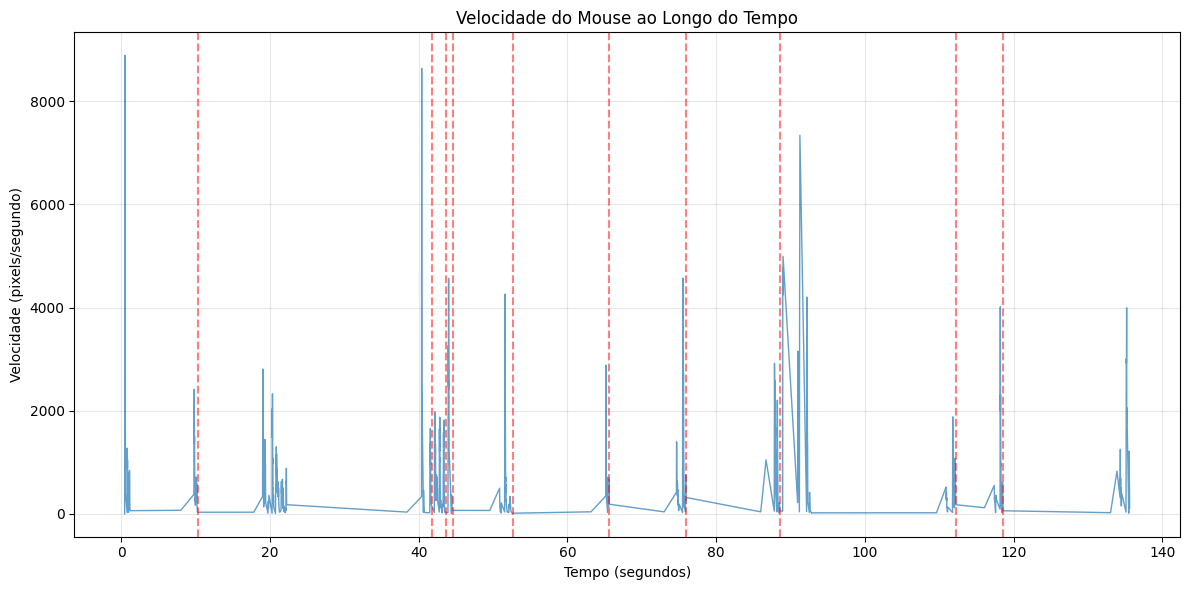

In [20]:
def calculate_velocity(df):
    df = df.copy()
    df['delta_time'] = df['Timestamp'].diff()
    df['delta_x'] = df['PosX'].diff()
    df['delta_y'] = df['PosY'].diff()
    df['distance'] = np.sqrt(df['delta_x']**2 + df['delta_y']**2)
    df['velocity'] = df['distance'] / df['delta_time']
    df['velocity'] = df['velocity'].fillna(0)
    return df

mouse_with_velocity = calculate_velocity(mouse_data)

plt.figure(figsize=(12, 6))
plt.plot(mouse_with_velocity['Timestamp'], mouse_with_velocity['velocity'],
         linewidth=1, alpha=0.7)
plt.xlabel('Tempo (segundos)')
plt.ylabel('Velocidade (pixels/segundo)')
plt.title('Velocidade do Mouse ao Longo do Tempo')
plt.grid(True, alpha=0.3)

for _, click in clicks_data.iterrows():
    plt.axvline(x=click['Timestamp'], color='red', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.savefig("vel_mouse.png")
plt.show()

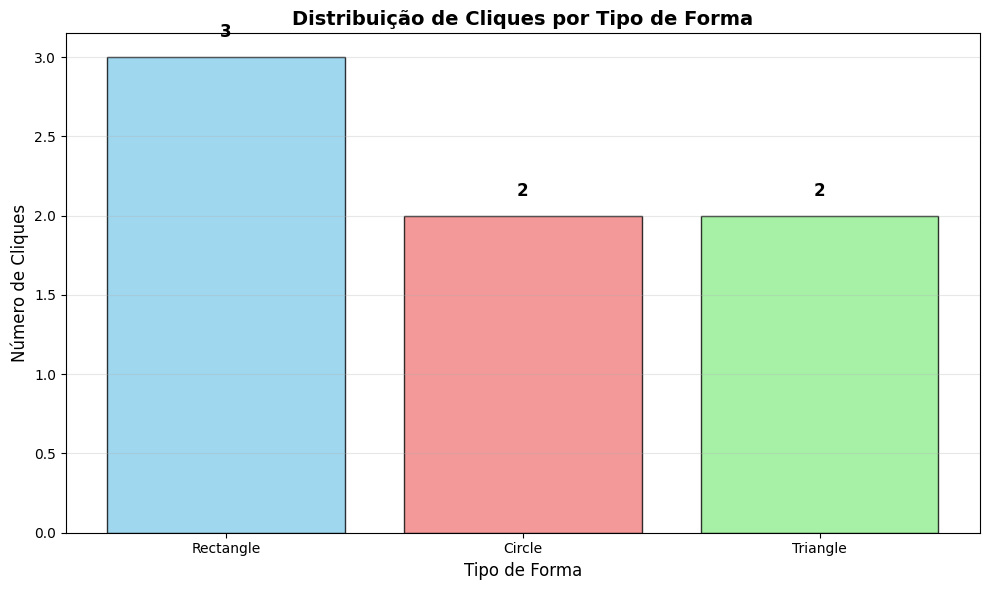

=== ESTATÍSTICAS DE CLIQUES POR FORMA ===
ShapeType
Rectangle    3
Circle       2
Triangle     2
Name: count, dtype: int64

Forma com mais cliques: Rectangle (3 cliques)
Total de cliques válidos: 7


In [22]:
plt.figure(figsize=(10, 6))

contagem_formas = clicks_data['ShapeType'].value_counts()

bars = plt.bar(contagem_formas.index, contagem_formas.values,
               color=['skyblue', 'lightcoral', 'lightgreen', 'gold'],
               edgecolor='black', alpha=0.8)

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.1,
             f'{int(height)}', ha='center', va='bottom', fontsize=12, fontweight='bold')

plt.xlabel('Tipo de Forma', fontsize=12)
plt.ylabel('Número de Cliques', fontsize=12)
plt.title('Distribuição de Cliques por Tipo de Forma', fontsize=14, fontweight='bold')
plt.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.savefig("shapes_distribution.png")
plt.show()

print("=== ESTATÍSTICAS DE CLIQUES POR FORMA ===")
print(contagem_formas)
print(f"\nForma com mais cliques: {contagem_formas.index[0]} ({contagem_formas.values[0]} cliques)")
print(f"Total de cliques válidos: {contagem_formas.sum() - contagem_formas.get('None', 0)}")